In [1]:
!if [[ -d combined-soft-nms-op ]]; then echo 'deleting combined-soft-nms-op/'; rm -rf combined-soft-nms-op; fi;

In [2]:
!python -m pip install "tensorflow>=2.4.0,<2.9.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!git clone https://github.com/waldemarmeier/combined-soft-nms-op.git

Cloning into 'combined-soft-nms-op'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 162 (delta 54), reused 123 (delta 33), pack-reused 0
Receiving objects: 100% (162/162), 100.50 KiB | 1.34 MiB/s, done.
Resolving deltas: 100% (54/54), done.


In [4]:
!pip install https://github.com/waldemarmeier/easy-efficientdet/archive/refs/tags/v0.1.0.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 125 kB 358 kB/s
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for easy-efficientdet: filename=easy_efficientdet-0.1.0-py3-none-any.whl size=119667 sha256=1ef84b1f0ef3bf95da6754fda296c808832d19cccc98b7be7e99c26bf2dd88f3
  Stored in directory: /tmp/pip-ephem-wheel-cache-100zosmo/wheels/0b/49/d4/7b4ba2f8f878feb76fe5c2af8df9329787102bba2f0418b825
Successfully built easy-efficientdet


In [5]:
!cd ./combined-soft-nms-op && make clean combined_soft_nms_op combined_soft_nms_pip_pkg
!if [[ "$(python -m pip freeze)" =~ tensorflow-combined-soft-nms-custom-op ]]; then echo 'uninstalling tensorflow-combined-soft-nms-custom-op'; echo y |python -m pip uninstall tensorflow-combined-soft-nms-custom-op; fi;
!python -m pip install --no-cache-dir ./combined-soft-nms-op/artifacts/tensorflow_combined_soft_nms_custom_op-0.0.1-cp37-cp37m-linux_x86_64.whl

rm -f tensorflow_combined_soft_nms/python/ops/_combined_soft_nms_ops.so
g++ -I/usr/local/lib/python3.7/dist-packages/tensorflow/include -D_GLIBCXX_USE_CXX11_ABI=0 -DEIGEN_MAX_ALIGN_BYTES=64 -fPIC -O2 -std=c++14 -o tensorflow_combined_soft_nms/python/ops/_combined_soft_nms_ops.so tensorflow_combined_soft_nms/cc/kernels/combined_soft_nms.cc tensorflow_combined_soft_nms/cc/ops/combined_soft_nms_ops.cc -shared -L/usr/local/lib/python3.7/dist-packages/tensorflow -l:libtensorflow_framework.so.2
./build_pip_pkg.sh make artifacts
++ uname -s
++ tr A-Z a-z
+ PLATFORM=linux
+ is_windows
+ [[ linux =~ (cygwin|mingw32|mingw64|msys)_nt* ]]
+ false
+ PIP_FILE_PREFIX=bazel-bin/build_pip_pkg.runfiles/__main__/
+ main make artifacts
+ [[ ! -z make ]]
+ [[ make == \m\a\k\e ]]
+ echo 'Using Makefile to build pip package.'
Using Makefile to build pip package.
+ PIP_FILE_PREFIX=
+ shift
+ [[ ! -z artifacts ]]
+ [[ artifacts == \m\a\k\e ]]
+ DEST=artifacts
+ shift
+ [[ ! -z '' ]]
+ [[ -z artifacts ]]
+ mkdi

In [6]:
import tensorflow as tf
print('tf-version:', tf.__version__)
from tensorflow_combined_soft_nms.python.ops.combined_soft_nms_ops import combined_soft_nms

tf-version: 2.8.2


In [7]:
# try it out with random input
combined_soft_nms(tf.random.uniform((2,2,1,4)), tf.random.uniform((2,2,3)), 5, 5, .5, .35, .5)

CombinedSoftNonMaxSuppression(nmsed_boxes=<tf.Tensor: shape=(2, 5, 4), dtype=float32, numpy=
array([[[0.63810885, 0.04768789, 0.3442521 , 0.78684926],
        [0.63810885, 0.04768789, 0.3442521 , 0.78684926],
        [0.30721223, 0.21183264, 0.06531203, 0.6034124 ],
        [0.30721223, 0.21183264, 0.06531203, 0.6034124 ],
        [0.63810885, 0.04768789, 0.3442521 , 0.78684926]],

       [[0.787029  , 0.6303605 , 0.6928953 , 0.31103182],
        [0.787029  , 0.6303605 , 0.6928953 , 0.31103182],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]]], dtype=float32)>, nmsed_scores=<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[0.78788793, 0.7460271 , 0.7185916 , 0.63100636, 0.44082367],
       [0.7071831 , 0.6463034 , 0.        , 0.        , 0.        ]],
      dtype=float32)>, nmsed_classes=<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[1., 2., 2., 0

In [8]:
!wget https://raw.githubusercontent.com/google/automl/426b5a82b96afb2aa90e0eaf17335118e0aad8fd/efficientdet/g3doc/street.jpg

--2022-06-12 08:51:38--  https://raw.githubusercontent.com/google/automl/426b5a82b96afb2aa90e0eaf17335118e0aad8fd/efficientdet/g3doc/street.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 408801 (399K) [image/jpeg]
Saving to: ‘street.jpg’

street.jpg          100%[===================>] 399.22K  --.-KB/s    in 0.04s   

2022-06-12 08:51:38 (9.50 MB/s) - ‘street.jpg’ saved [408801/408801]



In [9]:
from easy_efficientdet.utils import download_model
from easy_efficientdet import DefaultConfig, EfficientDet, EfficientDetFactory
from easy_efficientdet.boxencoding import generate_anchor_boxes
from easy_efficientdet.utils import convert_to_corners
from easy_efficientdet.visualization import run_inference_for_plot, plot_image_bbox

In [10]:
!if [[ -f "effdetd0_coco.h5" ]]; then du -sh effdetd0_coco.h5; md5sum effdetd0_coco.h5; fi;

In [11]:
path_weights = 'effdetd0_coco.h5'
download_model('https://github.com/waldemarmeier/easy-efficientdet/releases/download/v0.1.0/effdetd0_coco.h5',
                md5_hash='f1a5bf7df535ed2937f78abe428cbeb6',
                file_name=path_weights)

2022-06-12 08:51:39,176 - easy-efficientdet.utils - INFO - Saving model weights to ./effdetd0_coco.h5
16146432/16137056 [==============================] - 1s 0us/step


'./effdetd0_coco.h5'

In [12]:
config = DefaultConfig(num_cls=90, 
                       batch_size=1, 
                       warmup_epochs=1,
                       train_data_path=None, 
                       val_data_path=None, 
                       epochs=1,
                       path_weights=path_weights,
                       )

2022-06-12 08:51:41,029 - easy-efficientdet - WARNING - 'train_data_path' has to be provided so set up training automatically using Config object


In [13]:
config.image_shape = [1280, 1920, 3]

In [14]:
factory = EfficientDetFactory(config)

In [15]:
tf.keras.backend.clear_session()
model = factory.build_model()

16719872/16705208 [==============================] - 0s 0us/step
2022-06-12 08:51:44,613 - easy-efficientdet - INFO - using backbone: efficientnetb0
2022-06-12 08:51:44,624 - easy-efficientdet - INFO - extracted following layers: block1a_project_bn/FusedBatchNormV3:0, block2b_add/add:0, block3b_add/add:0, block5c_add/add:0, block7a_project_bn/FusedBatchNormV3:0
2022-06-12 08:51:52,797 - easy-efficientdet - INFO - loading model weights from 'effdetd0_coco.h5' with by_name=True and skip_mismatch=True


In [16]:
!wget https://user-images.githubusercontent.com/11736571/77320690-099af300-6d37-11ea-9d86-24f14dc2d540.png -O img.png

--2022-06-12 08:51:53--  https://user-images.githubusercontent.com/11736571/77320690-099af300-6d37-11ea-9d86-24f14dc2d540.png
Resolving user-images.githubusercontent.com (user-images.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to user-images.githubusercontent.com (user-images.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4080549 (3.9M) [image/png]
Saving to: ‘img.png’

img.png             100%[===================>]   3.89M  --.-KB/s    in 0.09s   

2022-06-12 08:51:53 (42.2 MB/s) - ‘img.png’ saved [4080549/4080549]



In [17]:
from typing import Optional, Sequence


class DecodePredictionsSoft(tf.keras.layers.Layer):
    """A Keras layer that decodes predictions of the RetinaNet model.

    Attributes:
      num_classes: Number of classes in the dataset
      confidence_threshold: Minimum class probability, below which detections
        are pruned.
      nms_iou_threshold: IOU threshold for the NMS operation
      max_detections_per_class: Maximum number of detections to retain per
       class.
      max_detections: Maximum number of detections to retain across all
        classes.
      box_variance: The scaling factors used to scale the bounding box
        predictions.
    """
    def __init__(self,
                 num_classes: int = 4,
                 image_shape: Sequence[int] = (512, 512),
                 confidence_threshold: float = 0.05,
                 nms_iou_threshold: float = 0.5,
                 max_detections_per_class: int = 100,
                 max_detections: int = 100,
                 box_variance: Optional[Sequence[float]] = None,
                 sigma: float = .05,
                 **kwargs):
        super().__init__(**kwargs)
        self.num_classes = num_classes
        self.confidence_threshold = confidence_threshold
        self.nms_iou_threshold = nms_iou_threshold
        self.max_detections_per_class = max_detections_per_class
        self.max_detections = max_detections
        self.sigma = sigma
        # TODO generate_anchor_boxes must be better configurable
        self._anchor_box = generate_anchor_boxes(image_shape) / \
              [image_shape[1], image_shape[0], image_shape[1], image_shape[0]]
        self.box_variance = box_variance

    def _decode_box_predictions(self, anchor_boxes, box_predictions):

        if self.box_variance is not None:
            boxes = box_predictions * self.box_variance
        else:
            boxes = box_predictions

        boxes = tf.concat(
            [
                boxes[:, :, :2] * anchor_boxes[:, :, 2:] + anchor_boxes[:, :, :2],
                tf.math.exp(boxes[:, :, 2:]) * anchor_boxes[:, :, 2:],
            ],
            axis=-1,
        )
        boxes_transformed = convert_to_corners(boxes)
        return boxes_transformed

    def call(self, predictions):
        #         image_shape = tf.cast(tf.shape(images), dtype=tf.float32)
        # .get_anchors(image_shape[1], image_shape[2])
        box_predictions = predictions[..., :4]
        cls_predictions = tf.nn.sigmoid(predictions[:, :, 4:])
        boxes = self._decode_box_predictions(self._anchor_box[None, ...],
                                             box_predictions)
        
        # boxes = boxes / self._box_normalizer
        boxes = tf.expand_dims(boxes, axis=2)

        return combined_soft_nms(boxes, 
                                 cls_predictions,
                                 self.max_detections_per_class,
                                 self.max_detections,
                                 self.nms_iou_threshold,
                                 self.confidence_threshold,
                                 self.sigma,)

In [18]:
inp = x = tf.keras.layers.Input(config.image_shape)
x = model(x, training=False)
decoder = DecodePredictionsSoft(90, config.image_shape[:2], 0.35, .5, 500, 1000, None, .5)
x = decoder(x)
inf_model = tf.keras.Model(inp, x)

In [19]:
img = tf.cast(tf.image.decode_png(tf.io.read_file('img.png')), tf.float32)
img = tf.image.resize(img, config.image_shape[:2])

In [20]:
pred_bboxes, pred_probs, pred_cls_ids = run_inference_for_plot(inf_model, img)

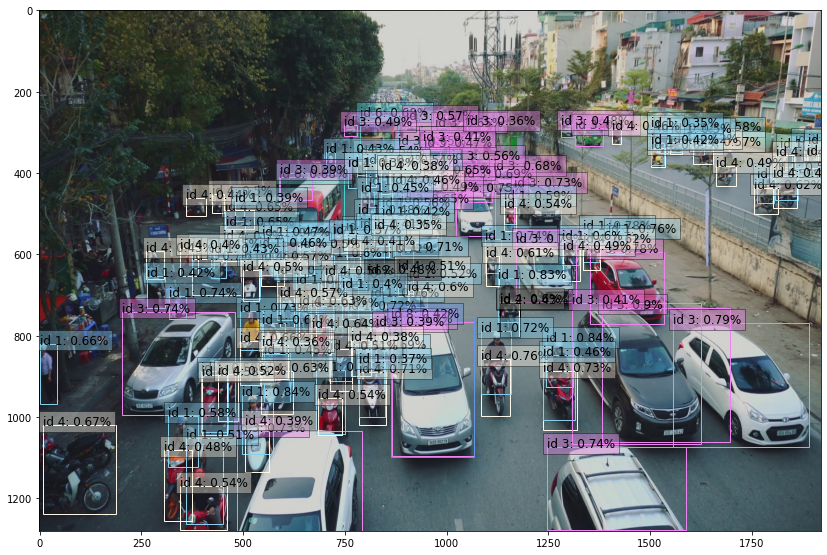

In [21]:
# light lines is ground truth
plot_image_bbox(img, 
                bboxes=None, 
                bbox_cls_ids=None,
                bbox_format=None,
                pred_bboxes=pred_bboxes,
                pred_bbox_cls_ids=pred_cls_ids,
                pred_bboxes_probs=pred_probs,
                label_map=None,
                pred_bbox_format='rel_corner_xy',
                figsize=(14, 14))